In [1]:
!pip install genepy3d

     |████████████████████████████████| 53 kB 171 kB/s eta 0:00:01
     |████████████████████████████████| 771 kB 209 kB/s eta 0:00:01
     |████████████████████████████████| 41 kB 166 kB/s eta 0:00:011
     |████████████████████████████████| 81 kB 403 kB/s eta 0:00:01
     |████████████████████████████████| 711 kB 384 kB/s eta 0:00:01
     |████████████████████████████████| 632 kB 249 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 479 kB/s eta 0:00:01
     |████████████████████████████████| 86 kB 329 kB/s eta 0:00:011
     |████████████████████████████████| 112 kB 157 kB/s eta 0:00:01
  Created wheel for numpy-stl: filename=numpy_stl-2.16.0-cp37-cp37m-linux_x86_64.whl size=50760 sha256=31e2196c57c43252331e9a2ec594166323d68c19da385656208d8a0da9c04c8f
  Stored in directory: /home/maria/.cache/pip/wheels/29/de/a3/35f69379a5cd8f20d547386cd846c6852e4e0adba425ec7316
  Created wheel for PyAstronomy: filename=PyAstronomy-0.16.0-py3-none-any.whl size=504497 sha256=71694b8f51c66

In [3]:
filename = "home/maria/Documents/NeuroHacking/18_mod_T_160718_F6M9_prey+RF_02.swc"
neuron = Tree.from_swc(filename)

NameError: name 'Tree' is not defined

Neuron converted!
id                                                 0
name                 18_mod_T_160718_F6M9_prey+RF_02
root                                             [1]
nb_nodes                                       [475]
nb_leaves                                       [39]
nb_branchingnodes                               [36]
nb_connectors                                    [0]
dtype: object
[64, 65, 75, 83, 88, 95, 100, 102, 103, 107, 138, 139, 157, 168, 169, 211, 226, 241, 245, 253, 272, 276, 288, 304, 310, 322, 331, 347, 372, 400, 404, 409, 428, 439, 454, 471]


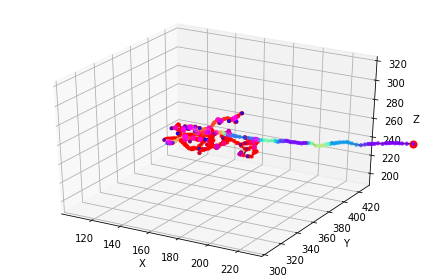

In [5]:
from genepy3d.obj.trees import Tree
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import numpy as np

def plot_line(ax,projection,x,y,z,scales=(1.,1.,1.),line_args={}):
    """Support plotting a line.

    Args:
        ax: axis to be plotted.
        projection (str): support *3d, xy, xz, yz*.
        x (float): x coordinate.
        y (float): y coordinate.
        z (float): z coordinate.
        scales (tuple of float): axis scales.
        line_args (dic): matplotlib args for line plot.

    """

    x = x / scales[0]
    y = y / scales[1]
    z = z / scales[2]

    if projection=='3d':
        pl = ax.plot(x,y,z,**line_args)
    else:
        if projection=='xy':
            _x, _y = x, y
        elif projection=='xz':
            _x, _y = x, z
        else:
            _x, _y = y, z

        pl = ax.plot(_x,_y,**line_args)

    return pl


#From http://neuromorpho.org/neuron_info.jsp?neuron_name=Neuron-2-2
filename = "/home/maria/Documents/NeuroHacking/18_mod_T_160718_F6M9_prey+RF_02.swc"
neuron = Tree.from_swc(filename)
print('Neuron converted!')
short_summary = neuron.summary()
print(short_summary)
print(neuron.get_branchingnodes())

r_lst = np.arange(1,51,5)
df = neuron.compute_local_3d_scale(r_lst)

meandf = df.groupby("nodeid")["local_scale"].mean()

'''
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
neuron.plot(ax)
plt.show()
'''

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
neuron.plot(ax,weights=meandf,point_args={"cmap":"rainbow"},
            show_cbar=False,cbar_args={"shrink":0.5})
plt.tight_layout();

plt.show()